**EXERCÍCIO 02: SVM, kNN, DECISION TREE e CNN**
*   BRUNO PAIVA SMIT DE FREITAS

# CÓDIGO EXEMPLO

Utilizaremos o conjunto de dados cleveland.csv, onde foi desenvolvido o código código-exemplo-pca.py para prever se uma pessoa terá ou não doença do coração. Neste código foi utilizado o algoritmo Naive Bayes sendo realizado um pré- processamento de dados (uma vez que existem dados faltantes). Com os dados carregados e corrigidos, eles foram separados em treinamento (80%) e teste (20%). O resultado do treinamento e teste são apresentados nas matrizes de confusão da figura 2a e 2b, respectivamente.
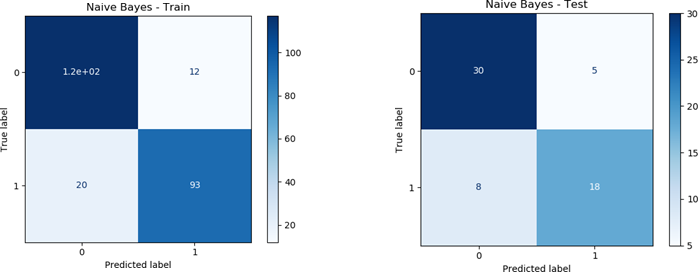


#kNN


In [16]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
# Conectando ao Google Drive
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Caminho para o arquivo Excel na pasta do Google Drive
file_path = '/content/gdrive/MyDrive/PROPECAUT | IFES/Reconhecimento de Padrões/Lista 1/cleveland.csv'

In [7]:
# Carregar o conjunto de dados
df = pd.read_csv(file_path, header=None)

In [8]:
# Nomear as colunas
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [9]:
# Mapeia as classes transformando o problema em binário
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [10]:
# Substituir valores nulos pela média
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [11]:
# Separar em X e y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
# Separar em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# Definir os valores de k
k_values = [3, 5, 7]

In [18]:
# Listas para armazenar as métricas
train_accuracies = []
test_accuracies = []
train_cms = []
test_cms = []

In [19]:
# Loop sobre os valores de k
for k in k_values:
    # Criar o classificador k-NN
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    # Treinar o modelo
    classifier.fit(X_train, y_train)

    # Prever no conjunto de treinamento
    y_pred_train = classifier.predict(X_train)

    # Calcular a matriz de confusão e acurácia para treinamento
    train_cm = confusion_matrix(y_train, y_pred_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Prever no conjunto de teste
    y_pred_test = classifier.predict(X_test)

    # Calcular a matriz de confusão e acurácia para teste
    test_cm = confusion_matrix(y_test, y_pred_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Armazenar métricas para análise posterior
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_cms.append(train_cm)
    test_cms.append(test_cm)

    # Imprimir resultados
    print(f"Para k = {k}:")
    print(f"Acurácia de treinamento: {train_accuracy:.2f}")
    print(f"Matriz de Confusão de treinamento:")
    print(train_cm)
    print(f"Acurácia de teste: {test_accuracy:.2f}")
    print(f"Matriz de Confusão de teste:")
    print(test_cm)
    print("="*50)

Para k = 3:
Acurácia de treinamento: 0.90
Matriz de Confusão de treinamento:
[[118  11]
 [ 12 101]]
Acurácia de teste: 0.82
Matriz de Confusão de teste:
[[31  4]
 [ 7 19]]
Para k = 5:
Acurácia de treinamento: 0.89
Matriz de Confusão de treinamento:
[[115  14]
 [ 13 100]]
Acurácia de teste: 0.80
Matriz de Confusão de teste:
[[31  4]
 [ 8 18]]
Para k = 7:
Acurácia de treinamento: 0.88
Matriz de Confusão de treinamento:
[[115  14]
 [ 14  99]]
Acurácia de teste: 0.80
Matriz de Confusão de teste:
[[32  3]
 [ 9 17]]


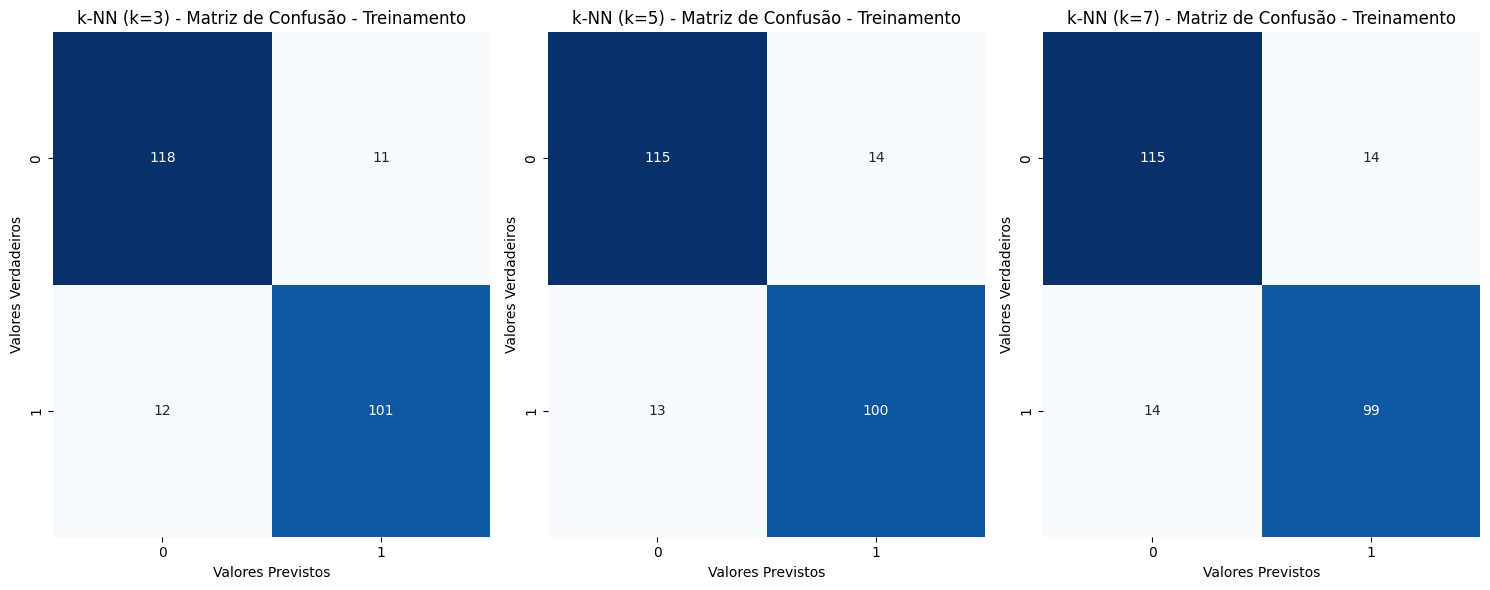

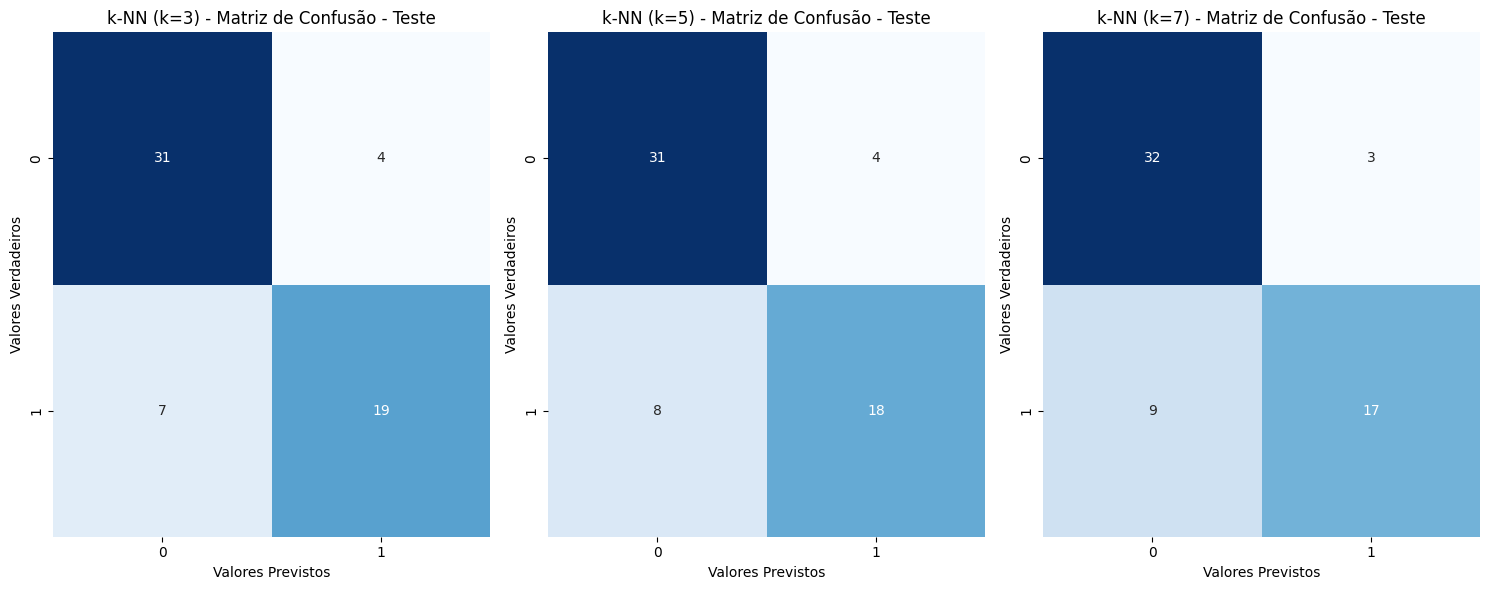

In [22]:
# Plotar as matrizes de confusão de treinamento e teste
plt.figure(figsize=(15, 6))
for i, k in enumerate(k_values):
    plt.subplot(1, 3, i+1)
    sns.heatmap(train_cms[i], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'k-NN (k={k}) - Matriz de Confusão - Treinamento')
    plt.xlabel('Valores Previstos')
    plt.ylabel('Valores Verdadeiros')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
for i, k in enumerate(k_values):
    plt.subplot(1, 3, i+1)
    sns.heatmap(test_cms[i], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'k-NN (k={k}) - Matriz de Confusão - Teste')
    plt.xlabel('Valores Previstos')
    plt.ylabel('Valores Verdadeiros')
plt.tight_layout()
plt.show()

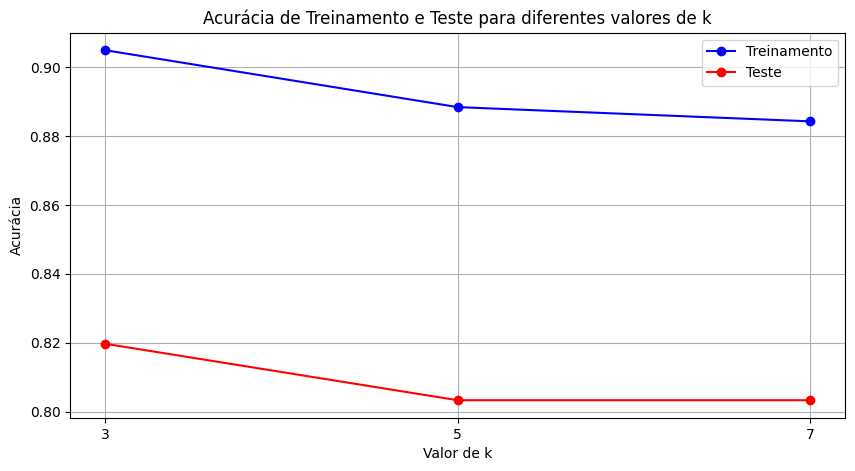

In [23]:
# Exibir as acurácias de treinamento e teste
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_accuracies, marker='o', linestyle='-', color='b', label='Treinamento')
plt.plot(k_values, test_accuracies, marker='o', linestyle='-', color='r', label='Teste')
plt.title('Acurácia de Treinamento e Teste para diferentes valores de k')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

#DECISION TREE

In [25]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
# Caminho para o arquivo Excel na pasta do Google Drive
file_path = '/content/gdrive/MyDrive/PROPECAUT | IFES/Reconhecimento de Padrões/Lista 1/cleveland.csv'

In [27]:
# Carregar o conjunto de dados
df = pd.read_csv(file_path, header=None)

# Nomear as colunas
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Mapear as classes transformando o problema em binário
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Substituir valores nulos pela média
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separar em X e y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
# Criar o classificador Árvore de Decisão
classifier = DecisionTreeClassifier(random_state=0)

In [29]:
# Treinar o modelo
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
# Prever no conjunto de treinamento
y_pred_train = classifier.predict(X_train)

In [31]:
# Calcular a matriz de confusão e acurácia para treinamento
train_cm = confusion_matrix(y_train, y_pred_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

In [32]:
# Prever no conjunto de teste
y_pred_test = classifier.predict(X_test)

In [33]:
# Calcular a matriz de confusão e acurácia para teste
test_cm = confusion_matrix(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

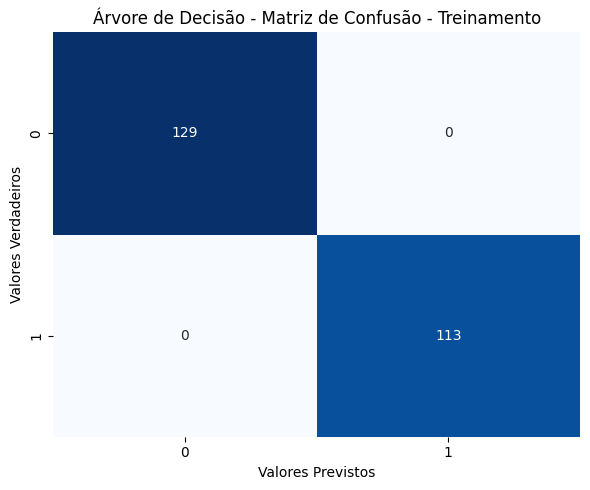

In [34]:
# Plotar a matriz de confusão de treinamento
plt.figure(figsize=(6, 5))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Árvore de Decisão - Matriz de Confusão - Treinamento')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.tight_layout()
plt.show()

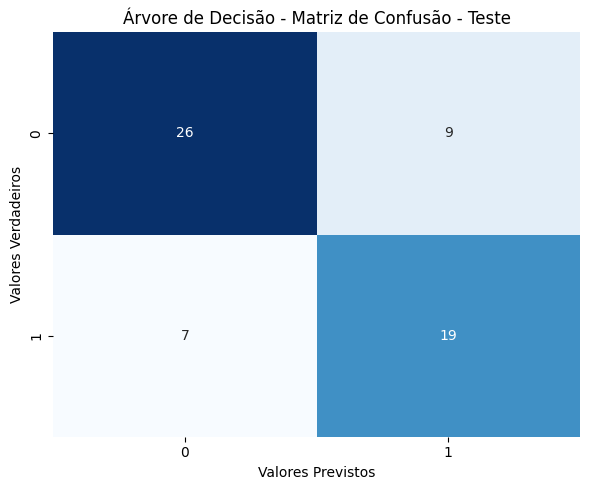

In [35]:
# Plotar a matriz de confusão de teste
plt.figure(figsize=(6, 5))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Árvore de Decisão - Matriz de Confusão - Teste')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.tight_layout()
plt.show()

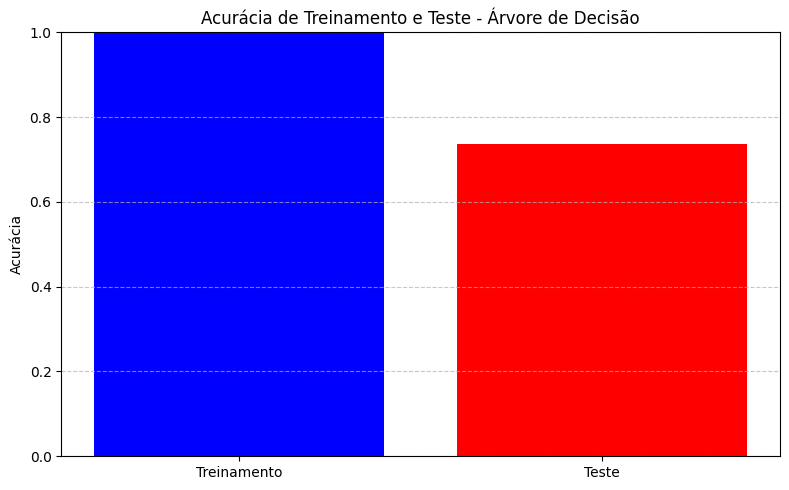

Acurácia para treinamento: 1.00
Acurácia para teste: 0.74


In [37]:
# Exibir a acurácia de treinamento e teste
plt.figure(figsize=(8, 5))
labels = ['Treinamento', 'Teste']
accuracies = [train_accuracy, test_accuracy]
colors = ['b', 'r']
plt.bar(labels, accuracies, color=colors)
plt.title('Acurácia de Treinamento e Teste - Árvore de Decisão')
plt.ylabel('Acurácia')
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f'Acurácia para treinamento: {train_accuracy:.2f}')
print(f'Acurácia para teste: {test_accuracy:.2f}')

# SUPPORT VECTOR MACHINES


In [40]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve
import numpy as np

In [41]:
# Carregar o conjunto de dados
df = pd.read_csv(file_path, header=None)

# Nomear as colunas
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Mapear as classes transformando o problema em binário
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Substituir valores nulos pela média
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separar em X e y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
# Criar classificadores SVM com kernels Linear e RBF
classifiers = {
    'SVM Linear': SVC(kernel='linear', random_state=0),
    'SVM RBF': SVC(kernel='rbf', random_state=0)
}

In [43]:
# Dicionários para armazenar resultados
train_accuracies = {}
test_accuracies = {}
confusion_matrices = {}

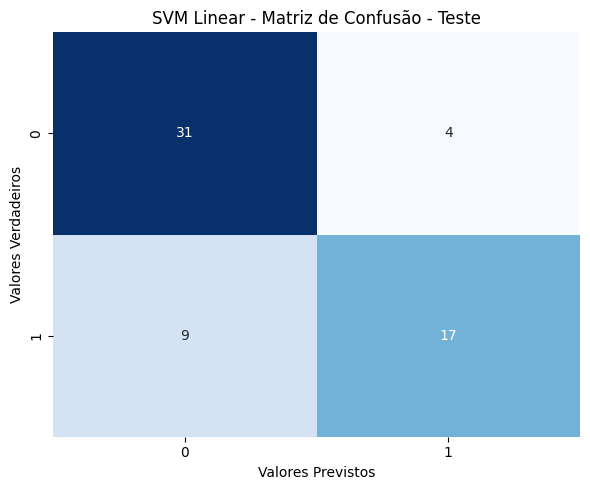

Acurácia para treinamento (SVM Linear): 0.86
Acurácia para teste (SVM Linear): 0.79



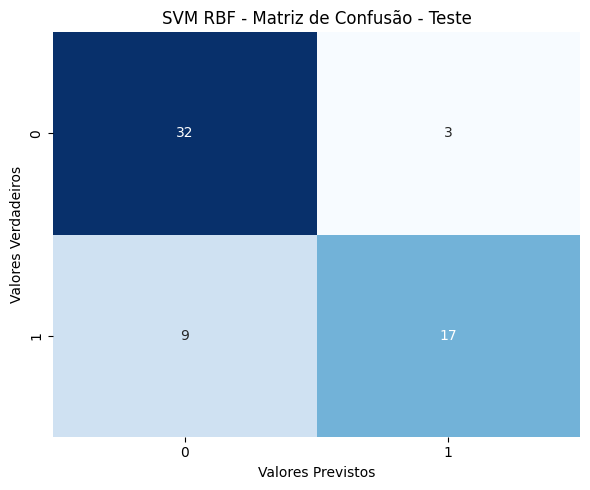

Acurácia para treinamento (SVM RBF): 0.93
Acurácia para teste (SVM RBF): 0.80



In [44]:
# Loop sobre os classificadores
for clf_name, clf in classifiers.items():
    # Treinar o modelo
    clf.fit(X_train, y_train)

    # Prever no conjunto de treinamento
    y_pred_train = clf.predict(X_train)

    # Calcular a acurácia para treinamento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_accuracies[clf_name] = train_accuracy

    # Prever no conjunto de teste
    y_pred_test = clf.predict(X_test)

    # Calcular a acurácia para teste
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_accuracies[clf_name] = test_accuracy

    # Calcular a matriz de confusão para teste
    test_cm = confusion_matrix(y_test, y_pred_test)
    confusion_matrices[clf_name] = test_cm

    # Plotar a matriz de confusão de teste
    plt.figure(figsize=(6, 5))
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{clf_name} - Matriz de Confusão - Teste')
    plt.xlabel('Valores Previstos')
    plt.ylabel('Valores Verdadeiros')
    plt.tight_layout()
    plt.show()

    print(f'Acurácia para treinamento ({clf_name}): {train_accuracy:.2f}')
    print(f'Acurácia para teste ({clf_name}): {test_accuracy:.2f}')
    print()

In [45]:
# PCA para reduzir a dimensionalidade para os dois primeiros componentes
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [46]:
# Função para plotar a curva de aprendizado
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de Treinamento")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Score de Treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Score de Cross-Validation")

    plt.legend(loc="best")
    return plt

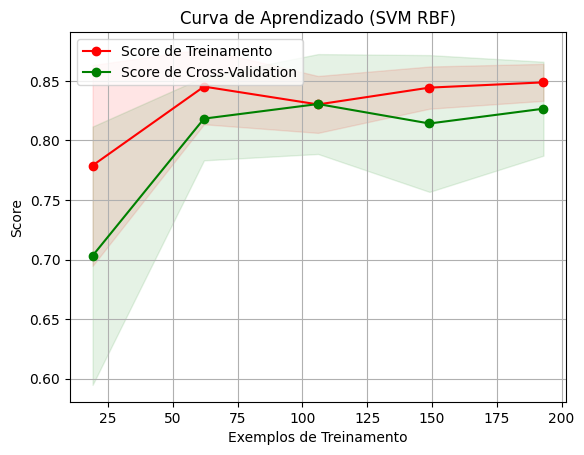

In [47]:
# Plotar a curva de aprendizado para SVM com kernel RBF
title = "Curva de Aprendizado (SVM RBF)"
estimator = SVC(kernel='rbf', random_state=0)
plot_learning_curve(estimator, title, X_train_pca, y_train, cv=5, n_jobs=-1)
plt.show()

# COMPARAÇÃO DOS RESULTADOS

**Resultados com Validação Cruzada (k=10)**

Para uma análise mais robusta, vamos repetir os resultados utilizando validação cruzada com k=10 e comparar com os resultados da partição 80-20. A validação cruzada fornece uma estimativa mais confiável do desempenho do modelo, pois utiliza múltiplas divisões dos dados em conjuntos de treinamento e teste.

**Implementação com Validação Cruzada**

Vamos usar validação cruzada com k=10 para cada algoritmo e calcular a média das acurácias obtidas em cada fold de teste.

In [50]:
from sklearn.model_selection import cross_val_score, KFold

# Definir os classificadores novamente
classifiers = {
    'k-NN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'k-NN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'k-NN (k=7)': KNeighborsClassifier(n_neighbors=7),
    'Árvore de Decisão': DecisionTreeClassifier(random_state=0),
    'SVM Linear': SVC(kernel='linear', random_state=0),
    'SVM RBF': SVC(kernel='rbf', random_state=0)
}

# Realizar validação cruzada com k=10
cv_results = {}
for clf_name, clf in classifiers.items():
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)
    scores = cross_val_score(clf, X, y, cv=kfold)
    cv_results[clf_name] = scores.mean()

# Exibir resultados de validação cruzada
print("Resultados com Validação Cruzada (k=10):")
for clf_name, score in cv_results.items():
    print(f"{clf_name}: Acurácia Média = {score:.2f}")

Resultados com Validação Cruzada (k=10):
k-NN (k=3): Acurácia Média = 0.83
k-NN (k=5): Acurácia Média = 0.82
k-NN (k=7): Acurácia Média = 0.82
Árvore de Decisão: Acurácia Média = 0.70
SVM Linear: Acurácia Média = 0.83
SVM RBF: Acurácia Média = 0.83


# CNN


Fashion-MNIST é um conjunto de dados de imagens de artigos de vestuário da empresa Zalando - consistindo 10.000 exemplos. Cada exemplo é uma imagem em tons de cinza de 28𝑥28, associada a um rótulo de 10 classes:

•	T-shirt/top

•	Trouser

•	Pullover

•	Dress

•	Coat

•	Sandal

•	Shirt

•	Sneaker

•	Bag

•	Ankle boot

O Fashion-MNIST é utilizado como um substituto direto para o conjunto de dados MNIST original para benchmarking de algoritmos de aprendizado de máquina. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste. Um tutorial oficial utilizando o Keras e o Fashion-MNIST pode ser encontrado no seguinte link: https://www.tensorflow.org/tutorials/keras/classification

Dado esse conjunto de imagens, projete uma rede neural convolucional para classificação dos objetos. O modelo deverá ser desenhado do zero seguindo o tutorial e deverá ser constituído de camadas convolutivas, camadas de pooling, diferentes funções de ativação e uma fully- connected layer na camada de saída. Escolha a função custo cross entropy e avalie a acurácia na base de teste.


In [52]:
# Importar as bibliotecas necessárias
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [53]:
# Carregar e Pré-Processar os Dados
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [54]:
# Normalizar os valores de pixel para o intervalo [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [55]:
#  Modelo da CNN
model = models.Sequential([
    # Camadas convolutivas e de pooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Camada Flatten para transição para uma camada densa (fully-connected)
    layers.Flatten(),

    # Camadas densas (fully-connected)
    layers.Dense(64, activation='relu'),

    # Camada de saída
    layers.Dense(10, activation='softmax')
])

In [56]:
# Compilar o Modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
# Treinar o Modelo
history = model.fit(train_images[..., tf.newaxis], train_labels, epochs=10,
                    validation_data=(test_images[..., tf.newaxis], test_labels))

Epoch 1/10
  59/1875 [..............................] - ETA: 1:12 - loss: 0.0183 - accuracy: 0.9952

KeyboardInterrupt: 

In [66]:
# Avaliar o Modelo na Base de Teste
test_loss, test_acc = model.evaluate(test_images[..., tf.newaxis], test_labels, verbose=2)
print(f'Acurácia na base de teste: {test_acc}')

313/313 - 2s - loss: 1.2071 - accuracy: 0.9058 - 2s/epoch - 6ms/step
Acurácia na base de teste: 0.9057999849319458


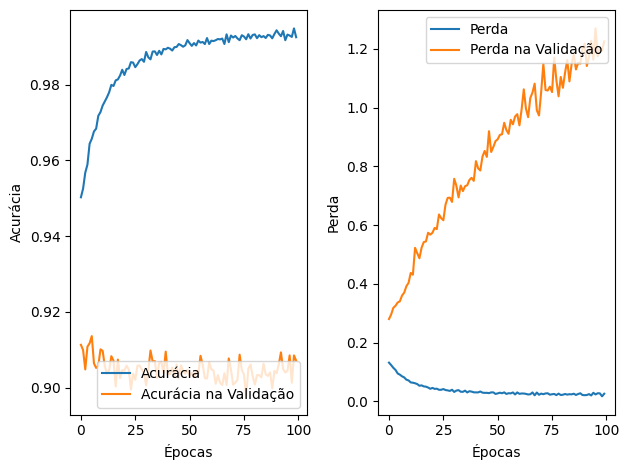

In [67]:
# Plotar acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia')
plt.plot(history.history['val_accuracy'], label = 'Acurácia na Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')

# Plotar perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda')
plt.plot(history.history['val_loss'], label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()